# Classifying Fashion-MNIST

Now it's your turn to build a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

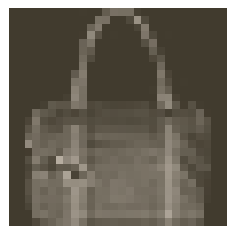

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [12]:
# TODO: Define your network architecture here
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits, dim=1)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [13]:
# TODO: Create the network, define the criterion and optimizer
net = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [14]:
# TODO: Train the network here
epochs = 10
print_every = 50
steps = 0
for i in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        images.resize_(images.size()[0], 784)
        inputs, targets = Variable(images), Variable(labels)
        optimizer.zero_grad()

        output = net.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if steps%print_every ==0:
            print("Epoch: {}/{}... ".format(i+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            running_loss = 0

C:\Users\lobov\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1/10...  Loss: 1.0603
Epoch: 1/10...  Loss: 0.6539
Epoch: 1/10...  Loss: 0.5694
Epoch: 1/10...  Loss: 0.5203
Epoch: 1/10...  Loss: 0.5199
Epoch: 1/10...  Loss: 0.4781
Epoch: 1/10...  Loss: 0.4822
Epoch: 1/10...  Loss: 0.4556
Epoch: 1/10...  Loss: 0.4749
Epoch: 1/10...  Loss: 0.4499
Epoch: 1/10...  Loss: 0.4690
Epoch: 1/10...  Loss: 0.4612
Epoch: 1/10...  Loss: 0.4421
Epoch: 1/10...  Loss: 0.4211
Epoch: 1/10...  Loss: 0.4348
Epoch: 1/10...  Loss: 0.4081
Epoch: 1/10...  Loss: 0.4066
Epoch: 1/10...  Loss: 0.4082
Epoch: 2/10...  Loss: 0.0894
Epoch: 2/10...  Loss: 0.3954
Epoch: 2/10...  Loss: 0.3652
Epoch: 2/10...  Loss: 0.3764
Epoch: 2/10...  Loss: 0.3670
Epoch: 2/10...  Loss: 0.4045
Epoch: 2/10...  Loss: 0.3668
Epoch: 2/10...  Loss: 0.3869
Epoch: 2/10...  Loss: 0.3868
Epoch: 2/10...  Loss: 0.3934
Epoch: 2/10...  Loss: 0.3872
Epoch: 2/10...  Loss: 0.3571
Epoch: 2/10...  Loss: 0.3710
Epoch: 2/10...  Loss: 0.3633
Epoch: 2/10...  Loss: 0.3717
Epoch: 2/10...  Loss: 0.3775
Epoch: 2/10...

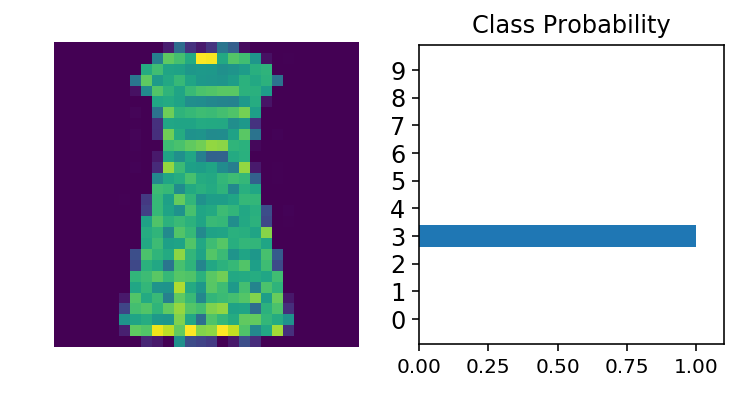

In [16]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = net.predict(img)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps)

In [17]:
torch.cuda.current_device()

0

In [19]:
torch.cuda.get_device_name(0)

'GeForce GTX 1070'

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.